In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score , accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest , mutual_info_classif , RFE
from sklearn.ensemble import ExtraTreesClassifier

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

In [2]:
data=pd.read_csv("MCSDatasetNEXTCONLab.csv", delimiter=',', encoding = "utf-8" )

In [3]:
data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [4]:
data.describe()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,2009.362745,45.484035,-75.217603,2.513946,12.348177,29.480185,44.219829,27.109914,5.838097,65.292184,0.182822,199039.373239,0.869028
std,1164.521555,0.058989,0.054501,1.704509,6.538839,17.353324,14.511027,14.993890,2.878052,20.311306,0.386534,101695.208646,0.337381
min,1.000000,45.365600,-75.334116,0.000000,0.000000,0.000000,10.000000,10.000000,1.000000,30.000000,0.000000,-9363.000000,0.000000
25%,989.000000,45.434521,-75.264506,1.000000,7.000000,14.000000,30.000000,10.000000,3.000000,48.000000,0.000000,112621.000000,1.000000
50%,2025.000000,45.484917,-75.220013,2.000000,13.000000,29.000000,50.000000,20.000000,6.000000,65.000000,0.000000,197082.000000,1.000000
75%,3011.000000,45.541527,-75.173048,4.000000,18.000000,45.000000,60.000000,40.000000,8.000000,82.000000,0.000000,300297.000000,1.000000
max,4000.000000,45.584678,-75.088915,6.000000,23.000000,59.000000,60.000000,60.000000,10.000000,100.000000,1.000000,375388.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [6]:
# Remove the ID column
data = data.drop(['ID'], axis=1)

# Split the dataset based on the "day" feature
train_data = data[data['Day'].isin([0, 1, 2])]
test_data = data[data['Day'] == 3]

# Remove the "day" feature from the datasets
train_data = train_data.drop(['Day'], axis=1)
test_data = test_data.drop(['Day'], axis=1)

In [7]:
#create x_train , y_train
x_train=train_data.drop(['Ligitimacy'], axis=1)
y_train=train_data['Ligitimacy']

#create x_test , y_test
x_test=test_data.drop(['Ligitimacy'], axis=1)
y_test=test_data['Ligitimacy']

In [8]:
x_train

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.442142,-75.303369,4,13,40,40,9,91,0,131380
1,45.442154,-75.304366,4,23,40,30,9,91,0,131380
2,45.442104,-75.303963,4,33,40,20,9,91,0,121996
3,45.441868,-75.303577,4,43,40,10,9,91,0,121996
4,45.447727,-75.147722,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...
14479,45.445303,-75.165596,1,18,20,20,10,80,0,131397
14480,45.445574,-75.165168,1,28,20,10,10,80,0,131397
14481,45.436682,-75.152416,12,21,30,30,4,63,0,122015
14482,45.436978,-75.153278,12,31,30,20,4,63,0,122015


In [9]:
x_test

,Latitude,Longitude,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
16,45.410236,-75.208755,22,25,30,30,10,32,0,75088
17,45.409787,-75.208022,22,35,30,20,10,32,0,75088
18,45.409407,-75.207825,22,45,30,10,10,32,0,65704
26,45.544018,-75.146364,20,39,20,20,2,82,0,300312
27,45.544576,-75.146364,20,49,20,10,2,82,0,300312
...,...,...,...,...,...,...,...,...,...,...
14429,45.541816,-75.177356,4,36,60,10,9,43,0,300308
14445,45.461207,-75.209171,3,4,40,40,4,60,0,159544
14446,45.461241,-75.209067,3,14,40,30,4,60,0,159544
14447,45.461261,-75.209205,3,24,40,20,4,60,0,159544


In [10]:
# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Predict using Naive Bayes classifier
nb_predictions = nb_classifier.predict(x_test)

# Calculate confusion matrix and F1 score for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_f1_score = f1_score(y_test, nb_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

#print
print("Naive Bayes Classifier:")
print("Confusion Matrix:")
print(nb_confusion_matrix)
print("F1 Score:", nb_f1_score)
print("Accuracy:", nb_accuracy)
print()

# Train K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predict using K-Nearest Neighbors classifier
knn_predictions = knn_classifier.predict(x_test)

# Calculate confusion matrix and F1 score for K-Nearest Neighbors
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

#print
print("K-Nearest Neighbors Classifier:")
print("Confusion Matrix:")
print(knn_confusion_matrix)
print("F1 Score:", knn_f1_score)
print("Accuracy:", knn_accuracy)

Naive Bayes Classifier:
Confusion Matrix:
[[   0  312]
 [   0 2148]]
F1 Score: 0.9322916666666667
Accuracy: 0.8731707317073171

K-Nearest Neighbors Classifier:
Confusion Matrix:
[[ 138  174]
 [ 159 1989]]
F1 Score: 0.9227557411273487
Accuracy: 0.8646341463414634


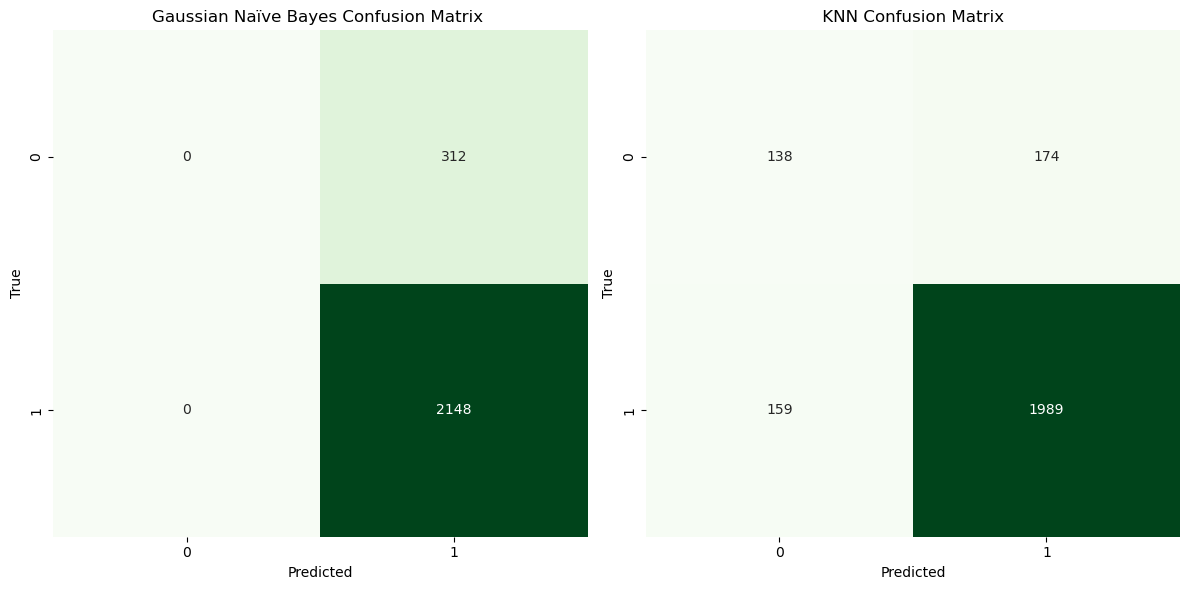

In [11]:
# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(nb_confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Gaussian Naïve Bayes Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(knn_confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title(" KNN Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("True")


plt.tight_layout()
plt.show()

In [12]:
def visualize_tsne(x_train, x_test,name):
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    x_train_tsne = tsne.fit_transform(x_train)
    x_test_tsne = tsne.fit_transform(x_test)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(name, fontweight='bold')
    
    # Plot t-SNE for the training set
    plt.subplot(1, 2, 1)
    plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='Greens')
    plt.title('2D t-SNE Plot - Training Set')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar()

    # Plot t-SNE for the test set
    plt.subplot(1, 2, 2)
    plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=y_test, cmap='Greens')
    plt.title('2D t-SNE Plot - Test Set')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar()
    plt.show()

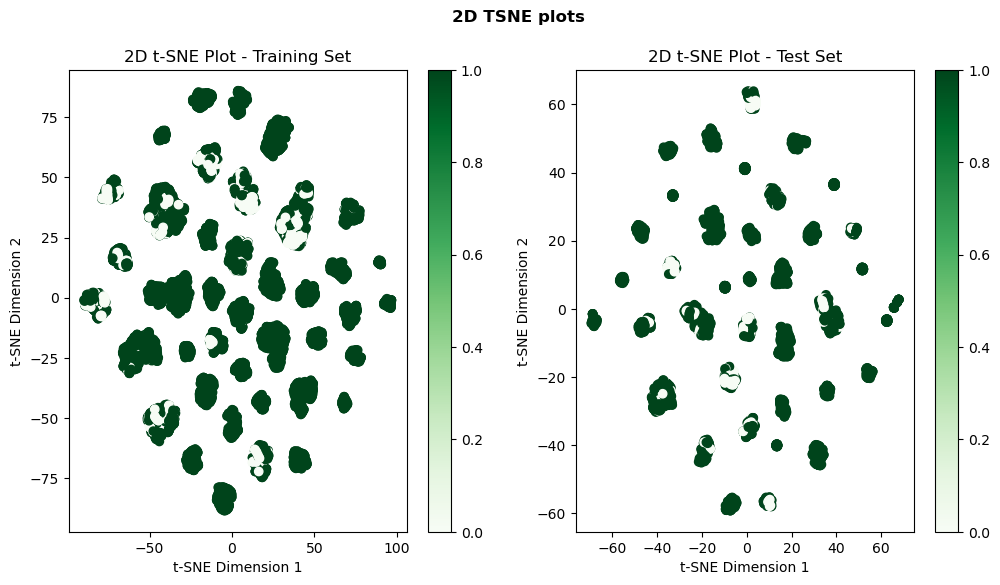

In [13]:
visualize_tsne(x_train, x_test,"2D TSNE plots")

In [14]:
n_components = range(2, x_train.shape[1]+1)
#scale data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
# Initialize variables
f1_scores_pca_nb = []
f1_scores_pca_knn = []

# Apply PCA for different dimensions
for n in n_components:
    # PCA
    pca = PCA(n_components=n, random_state=0)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    
    # Naive Bayes
    nb = GaussianNB()
    nb.fit(x_train_pca, y_train)
    y_pred_pca_nb = nb.predict(x_test_pca)
    f1_pca_nb = f1_score(y_test, y_pred_pca_nb)
    f1_scores_pca_nb.append(f1_pca_nb)
    
    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train_pca, y_train)
    y_pred_pca_knn = knn.predict(x_test_pca)
    f1_pca_knn = f1_score(y_test, y_pred_pca_knn)
    f1_scores_pca_knn.append(f1_pca_knn)

# Find the best performance for NB classifier
best_index_nb_pca = np.argmax(f1_scores_pca_nb)
best_dimension_nb_pca = n_components[best_index_nb_pca]
best_f1_score_nb_pca = f1_scores_pca_nb[best_index_nb_pca]

# Find the best performance for KNN classifier
best_index_knn_pca = np.argmax(f1_scores_pca_knn)
best_dimension_knn_pca = n_components[best_index_knn_pca]
best_f1_score_knn_pca = f1_scores_pca_knn[best_index_knn_pca]

#print PCA results
print("PCA results:")
print()
print("NB:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_pca_nb[i]}")
# Print the best performance for NB classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_nb_pca}")
print(f"F1 Score: {best_f1_score_nb_pca}")

print()
print("KNN:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_pca_knn[i]}")
# Print the best performance for KNN classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_knn_pca}")
print(f"F1 Score: {best_f1_score_knn_pca}")

PCA results:

NB:
F1 Score for dimensionality 2: 0.9117785077428437
F1 Score for dimensionality 3: 0.9102443609022556
F1 Score for dimensionality 4: 0.9230769230769231
F1 Score for dimensionality 5: 0.923611111111111
F1 Score for dimensionality 6: 0.9237896687514477
F1 Score for dimensionality 7: 0.9153018249883014
F1 Score for dimensionality 8: 0.9174440298507464
F1 Score for dimensionality 9: 0.9180251513740103
F1 Score for dimensionality 10: 0.9179869524697111
The best performance :
Dimensionality: 6
F1 Score: 0.9237896687514477

KNN:
F1 Score for dimensionality 2: 0.9165332723530757
F1 Score for dimensionality 3: 0.9297396913153652
F1 Score for dimensionality 4: 0.9268516395322174
F1 Score for dimensionality 5: 0.9254004576659041
F1 Score for dimensionality 6: 0.9130832570905764
F1 Score for dimensionality 7: 0.9155413138017853
F1 Score for dimensionality 8: 0.9158576051779935
F1 Score for dimensionality 9: 0.9204597701149425
F1 Score for dimensionality 10: 0.9204597701149425
The b

In [16]:
def create_autoencoder(input_dim, encoding_dim):
    
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(15, activation='relu')(input_layer)
    encoded = Dense(10, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    decoded = Dense(10, activation='relu')(encoded)
    decoded = Dense(15, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    
    return autoencoder


# Initialize variables
f1_scores_ae_nb = []
f1_scores_ae_knn = []

# Apply Autoencoder for different dimensions
for n in n_components:
    
    # Autoencoder
    autoencoder = create_autoencoder(x_train.shape[1], n)
    autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, verbose=0)
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
    x_train_ae = encoder.predict(x_train_scaled)
    x_test_ae = encoder.predict(x_test_scaled)
    
    # Naive Bayes
    nb = GaussianNB()   
    nb.fit(x_train_ae, y_train)
    y_pred_ae_nb = nb.predict(x_test_ae)
    f1_ae_nb = f1_score(y_test, y_pred_ae_nb)
    f1_scores_ae_nb.append(f1_ae_nb)
    
    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train_ae, y_train)
    y_pred_ae_knn = knn.predict(x_test_ae)
    f1_ae_knn = f1_score(y_test, y_pred_ae_knn)
    f1_scores_ae_knn.append(f1_ae_knn)
    
# Find the best performance for NB classifier
best_index_nb_ae = np.argmax(f1_scores_ae_nb)
best_dimension_nb_ae = n_components[best_index_nb_ae]
best_f1_score_nb_ae = f1_scores_ae_nb[best_index_nb_ae]

# Find the best performance for KNN classifier
best_index_knn_ae = np.argmax(f1_scores_ae_knn)
best_dimension_knn_ae = n_components[best_index_knn_ae]
best_f1_score_knn_ae = f1_scores_ae_knn[best_index_knn_ae]

#print AE results
print()
print("AE results:")
print()
print("NB:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_ae_nb[i]}")
# Print the best performance for NB classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_nb_ae}")
print(f"F1 Score: {best_f1_score_nb_ae}")

print()
print("KNN:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_ae_knn[i]}")
# Print the best performance for KNN classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_knn_ae}")
print(f"F1 Score: {best_f1_score_knn_ae}")

77/77 [==============================] - 0s 4ms/step

AE results:

NB:
F1 Score for dimensionality 2: 0.8735575742695803
F1 Score for dimensionality 3: 0.9035604810186277
F1 Score for dimensionality 4: 0.8735575742695803
F1 Score for dimensionality 5: 0.8867970069997586
F1 Score for dimensionality 6: 0.9201101928374656
F1 Score for dimensionality 7: 0.8735575742695803
F1 Score for dimensionality 8: 0.8956148713060058
F1 Score for dimensionality 9: 0.9038461538461539
F1 Score for dimensionality 10: 0.8913514815707058
The best performance :
Dimensionality: 6
F1 Score: 0.9201101928374656

KNN:
F1 Score for dimensionality 2: 0.9240218380345769
F1 Score for dimensionality 3: 0.9234612764024529
F1 Score for dimensionality 4: 0.9167433302667893
F1 Score for dimensionality 5: 0.9158279963403476
F1 Score for dimensionality 6: 0.915014809751652
F1 Score for dimensionality 7: 0.9221283398036082
F1 Score for dimensionality 8: 0.914614499424626
F1 Score for dimensionality 9: 0.9210766423357664
F1 S

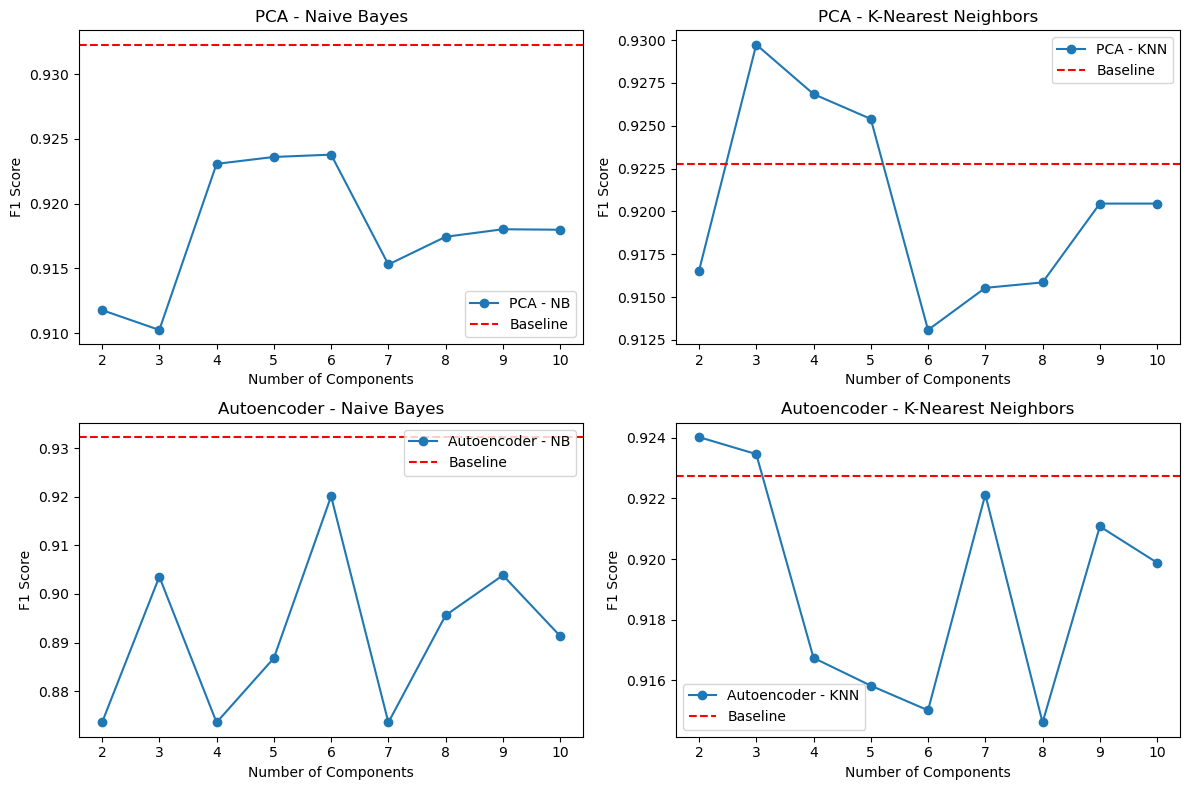

In [17]:
# Baseline performances
baseline_f1_nb = nb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn =knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting the results
plt.figure(figsize=(12, 8))

# PCA - Naive Bayes
plt.subplot(2, 2, 1)
plt.plot(n_components, f1_scores_pca_nb, marker='o', label='PCA - NB')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('PCA - Naive Bayes')
plt.legend()

# PCA - K-Nearest Neighbors
plt.subplot(2, 2, 2)
plt.plot(n_components, f1_scores_pca_knn, marker='o', label='PCA - KNN')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('PCA - K-Nearest Neighbors')
plt.legend()

# Autoencoder - Naive Bayes
plt.subplot(2, 2, 3)
plt.plot(n_components, f1_scores_ae_nb, marker='o', label='Autoencoder - NB')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('Autoencoder - Naive Bayes')
plt.legend()

# Autoencoder - K-Nearest Neighbors
plt.subplot(2, 2, 4)
plt.plot(n_components, f1_scores_ae_knn, marker='o', label='Autoencoder - KNN')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('Autoencoder - K-Nearest Neighbors')
plt.legend()

plt.tight_layout()
plt.show()

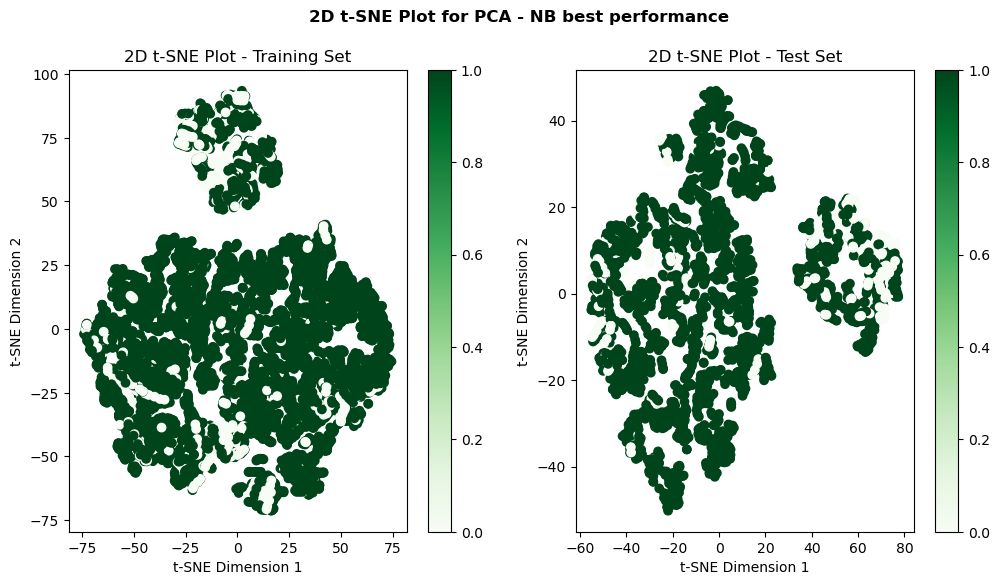

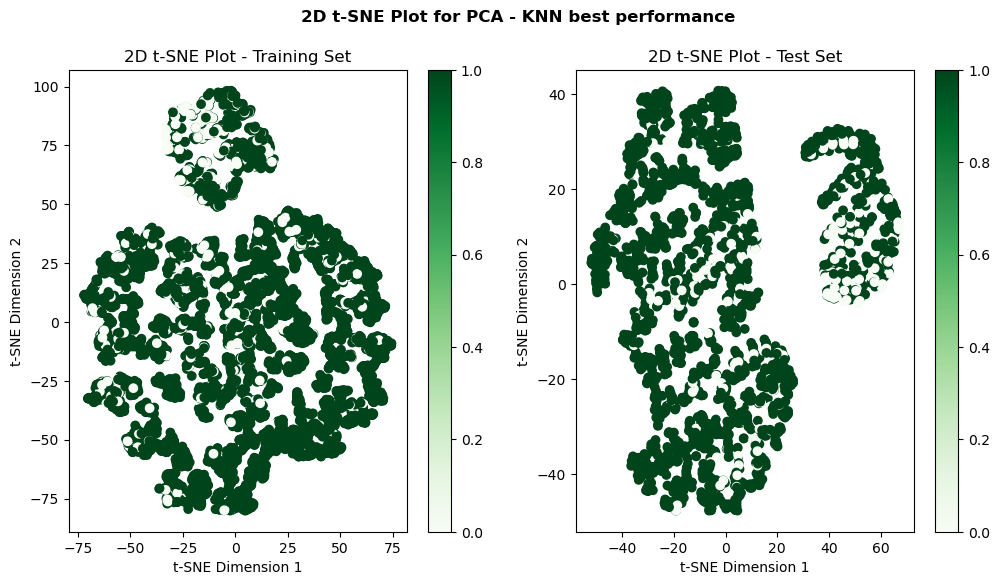

77/77 [==============================] - 0s 3ms/step


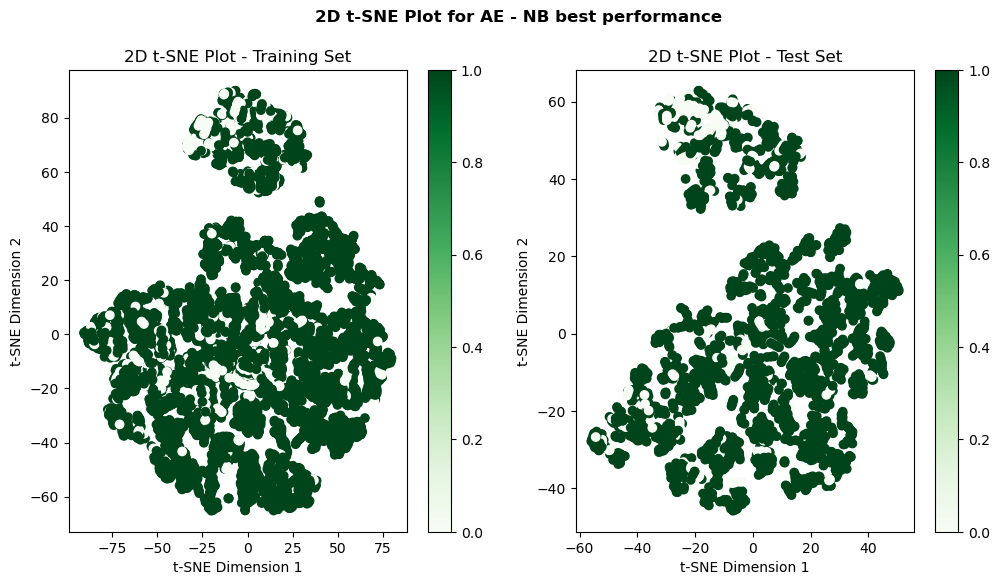

77/77 [==============================] - 0s 3ms/step


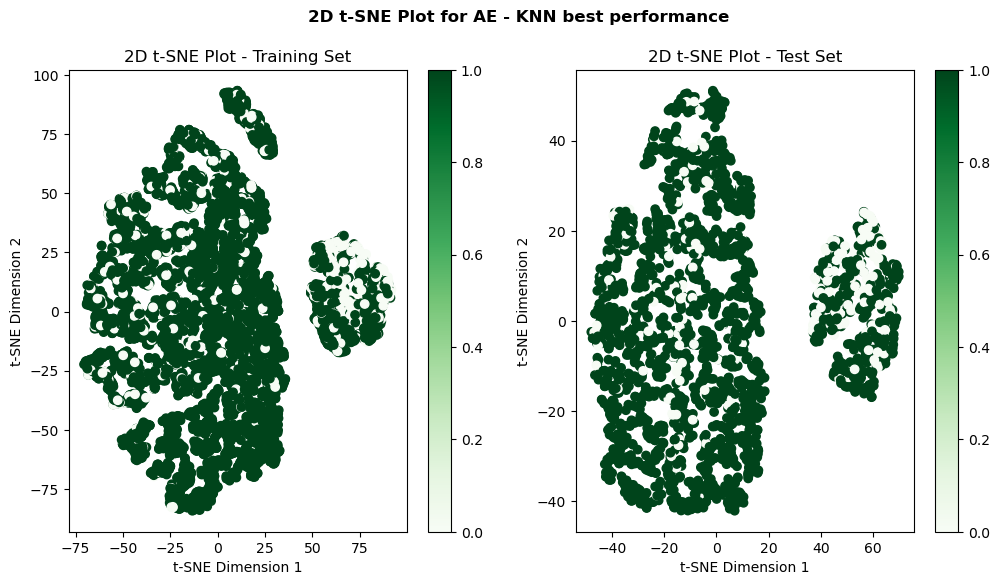

In [18]:
#draw 2D t-SNE Plot for PCA - NB best performance
pca = PCA(n_components=best_dimension_nb_pca, random_state=0)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

nb = GaussianNB()
nb.fit(x_train_pca, y_train)

visualize_tsne( x_train_pca, x_test_pca ,"2D t-SNE Plot for PCA - NB best performance")

#draw 2D t-SNE Plot for PCA - KNN best performance
pca = PCA(n_components=best_dimension_knn_pca, random_state=0)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

visualize_tsne( x_train_pca, x_test_pca,"2D t-SNE Plot for PCA - KNN best performance")

#draw 2D t-SNE Plot for AE - NB best performance
autoencoder = create_autoencoder(x_train.shape[1], best_dimension_nb_ae)
autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, verbose=0)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
x_train_ae = encoder.predict(x_train_scaled)
x_test_ae = encoder.predict(x_test_scaled)

knn = KNeighborsClassifier()
knn.fit(x_train_ae, y_train)

visualize_tsne(x_train_ae, x_test_ae,"2D t-SNE Plot for AE - NB best performance")

#draw 2D t-SNE Plot for AE - KNN best performance
autoencoder = create_autoencoder(x_train.shape[1], best_dimension_knn_ae)
autoencoder.fit(x_train_scaled, x_train_scaled, epochs=50, batch_size=32, verbose=0)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
x_train_ae = encoder.predict(x_train_scaled)
x_test_ae = encoder.predict(x_test_scaled)

knn = KNeighborsClassifier()
knn.fit(x_train_ae, y_train)

visualize_tsne(x_train_ae, x_test_ae,"2D t-SNE Plot for AE - KNN best performance")

In [19]:
# Filter method - Information Gain
f1_scores_info_gain_nb = []
f1_scores_info_gain_knn = []
accuracy_info_gain_nb = []
accuracy_info_gain_knn = []

for n in n_components:
    selector = SelectKBest(mutual_info_classif, k=n)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)

    # Naive Bayes
    nb = GaussianNB()
    nb.fit(x_train_selected, y_train)
    y_pred_nb = nb.predict(x_test_selected)
    f1_nb = f1_score(y_test, y_pred_nb)
    f1_scores_info_gain_nb.append(f1_nb)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    accuracy_info_gain_nb.append(accuracy_nb)

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train_selected, y_train)
    y_pred_knn = knn.predict(x_test_selected)
    f1_knn = f1_score(y_test, y_pred_knn)
    f1_scores_info_gain_knn.append(f1_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_info_gain_knn.append(accuracy_knn)
    
# Find the best performance for NB classifier
best_index_nb_filter = np.argmax(f1_scores_info_gain_nb)
best_dimension_nb_filter = n_components[best_index_nb_filter]
best_f1_score_nb_filter = f1_scores_info_gain_nb[best_index_nb_filter]

# Find the best performance for KNN classifier
best_index_knn_filter = np.argmax(f1_scores_info_gain_knn)
best_dimension_knn_filter = n_components[best_index_knn_filter]
best_f1_score_knn_filter = f1_scores_info_gain_knn[best_index_knn_filter]

#print Filter results
print()
print("Filter results:")
print()
print("NB:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_info_gain_nb[i]}")
# Print the best performance for NB classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_nb_filter}")
print(f"F1 Score: {best_f1_score_nb_filter}")

print()
print("KNN:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_info_gain_knn[i]}")
# Print the best performance for KNN classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_knn_filter}")
print(f"F1 Score: {best_f1_score_knn_filter}")


Filter results:

NB:
F1 Score for dimensionality 2: 0.9322916666666667
F1 Score for dimensionality 3: 0.9322916666666667
F1 Score for dimensionality 4: 0.9322916666666667
F1 Score for dimensionality 5: 0.9322916666666667
F1 Score for dimensionality 6: 0.9322916666666667
F1 Score for dimensionality 7: 0.9322916666666667
F1 Score for dimensionality 8: 0.9322916666666667
F1 Score for dimensionality 9: 0.9322916666666667
F1 Score for dimensionality 10: 0.9322916666666667
The best performance :
Dimensionality: 2
F1 Score: 0.9322916666666667

KNN:
F1 Score for dimensionality 2: 0.9833684703677676
F1 Score for dimensionality 3: 0.9824232481837357
F1 Score for dimensionality 4: 0.9804751823100447
F1 Score for dimensionality 5: 0.9804751823100447
F1 Score for dimensionality 6: 0.9757132751709503
F1 Score for dimensionality 7: 0.9328891004283675
F1 Score for dimensionality 8: 0.9266903914590747
F1 Score for dimensionality 9: 0.9345750873108265
F1 Score for dimensionality 10: 0.9227557411273487


In [20]:
# Wrapper Method - RFE
f1_scores_rfe_nb = []
f1_scores_rfe_knn = []
accuracy_rfe_nb = []
accuracy_rfe_knn = []
for n in n_components:
    selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=n)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)

    # Naive Bayes
    nb = GaussianNB()
    nb.fit(x_train_selected, y_train)
    y_pred_nb = nb.predict(x_test_selected)
    f1_nb = f1_score(y_test, y_pred_nb)
    f1_scores_rfe_nb.append(f1_nb)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    accuracy_rfe_nb.append(accuracy_nb)

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train_selected, y_train)
    y_pred_knn = knn.predict(x_test_selected)
    f1_knn = f1_score(y_test, y_pred_knn)
    f1_scores_rfe_knn.append(f1_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_rfe_knn.append(accuracy_knn)
    
# Find the best performance for NB classifier
best_index_nb_wrapper = np.argmax(f1_scores_rfe_nb)
best_dimension_nb_wrapper = n_components[best_index_nb_wrapper]
best_f1_score_nb_wrapper = f1_scores_info_gain_nb[best_index_nb_wrapper]

# Find the best performance for KNN classifier
best_index_knn_wrapper = np.argmax(f1_scores_rfe_knn)
best_dimension_knn_wrapper = n_components[best_index_knn_wrapper]
best_f1_score_knn_wrapper = f1_scores_info_gain_knn[best_index_knn_wrapper]

#print wrapper results
print()
print("wrapper results:")
print()
print("NB:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_rfe_nb[i]}")
# Print the best performance for NB classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_nb_wrapper}")
print(f"F1 Score: {best_f1_score_nb_wrapper}")

print()
print("KNN:")
for i in range(len(n_components)):
    print(f"F1 Score for dimensionality {n_components[i]}: {f1_scores_rfe_knn[i]}")
# Print the best performance for KNN classifier
print(f"The best performance :")
print(f"Dimensionality: {best_dimension_knn_wrapper}")
print(f"F1 Score: {best_f1_score_knn_wrapper}")


wrapper results:

NB:
F1 Score for dimensionality 2: 0.9322916666666667
F1 Score for dimensionality 3: 0.9322916666666667
F1 Score for dimensionality 4: 0.9322916666666667
F1 Score for dimensionality 5: 0.9322916666666667
F1 Score for dimensionality 6: 0.9322916666666667
F1 Score for dimensionality 7: 0.9322916666666667
F1 Score for dimensionality 8: 0.9322916666666667
F1 Score for dimensionality 9: 0.9322916666666667
F1 Score for dimensionality 10: 0.9322916666666667
The best performance :
Dimensionality: 2
F1 Score: 0.9322916666666667

KNN:
F1 Score for dimensionality 2: 0.9777152240206427
F1 Score for dimensionality 3: 0.9824232481837357
F1 Score for dimensionality 4: 0.9804751823100447
F1 Score for dimensionality 5: 0.9749882019820669
F1 Score for dimensionality 6: 0.9331111640085693
F1 Score for dimensionality 7: 0.9328891004283675
F1 Score for dimensionality 8: 0.9266903914590747
F1 Score for dimensionality 9: 0.9345750873108265
F1 Score for dimensionality 10: 0.9227557411273487

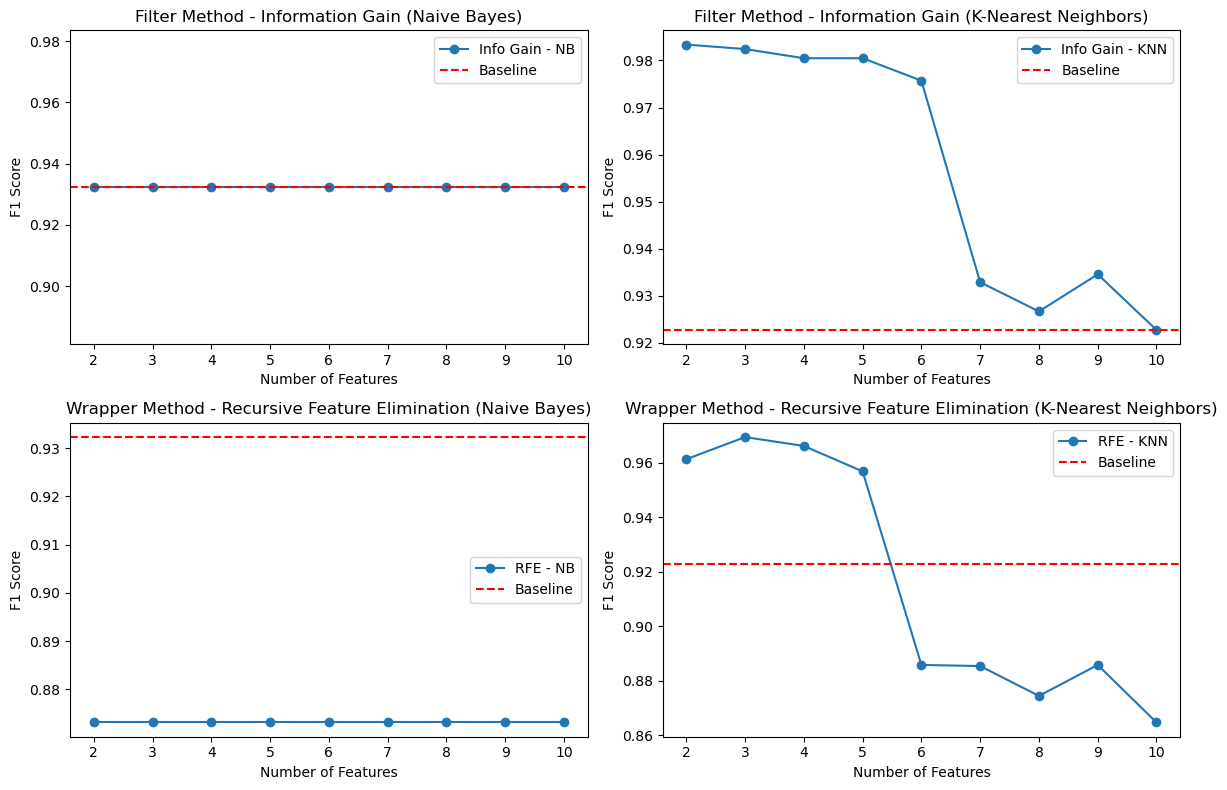

In [21]:
# Baseline performances
baseline_f1_nb = nb_f1_score  # F1 score of NB classifier in the baseline
baseline_f1_knn =knn_f1_score  # F1 score of KNN classifier in the baseline

# Plotting the results
plt.figure(figsize=(12, 8))

# Information Gain - Naive Bayes
plt.subplot(2, 2, 1)
plt.plot(n_components, f1_scores_info_gain_nb, marker='o', label='Info Gain - NB')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Filter Method - Information Gain (Naive Bayes)')
plt.legend()

# Information Gain - K-Nearest Neighbors
plt.subplot(2, 2, 2)
plt.plot(n_components, f1_scores_info_gain_knn, marker='o', label='Info Gain - KNN')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Filter Method - Information Gain (K-Nearest Neighbors)')
plt.legend()

# RFE - Naive Bayes
plt.subplot(2, 2, 3)
plt.plot(n_components, accuracy_rfe_nb, marker='o', label='RFE - NB')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Wrapper Method - Recursive Feature Elimination (Naive Bayes)')
plt.legend()

# RFE - K-Nearest Neighbors
plt.subplot(2, 2, 4)
plt.plot(n_components, accuracy_rfe_knn, marker='o', label='RFE - KNN')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Wrapper Method - Recursive Feature Elimination (K-Nearest Neighbors)')
plt.legend()

plt.tight_layout()
plt.show()

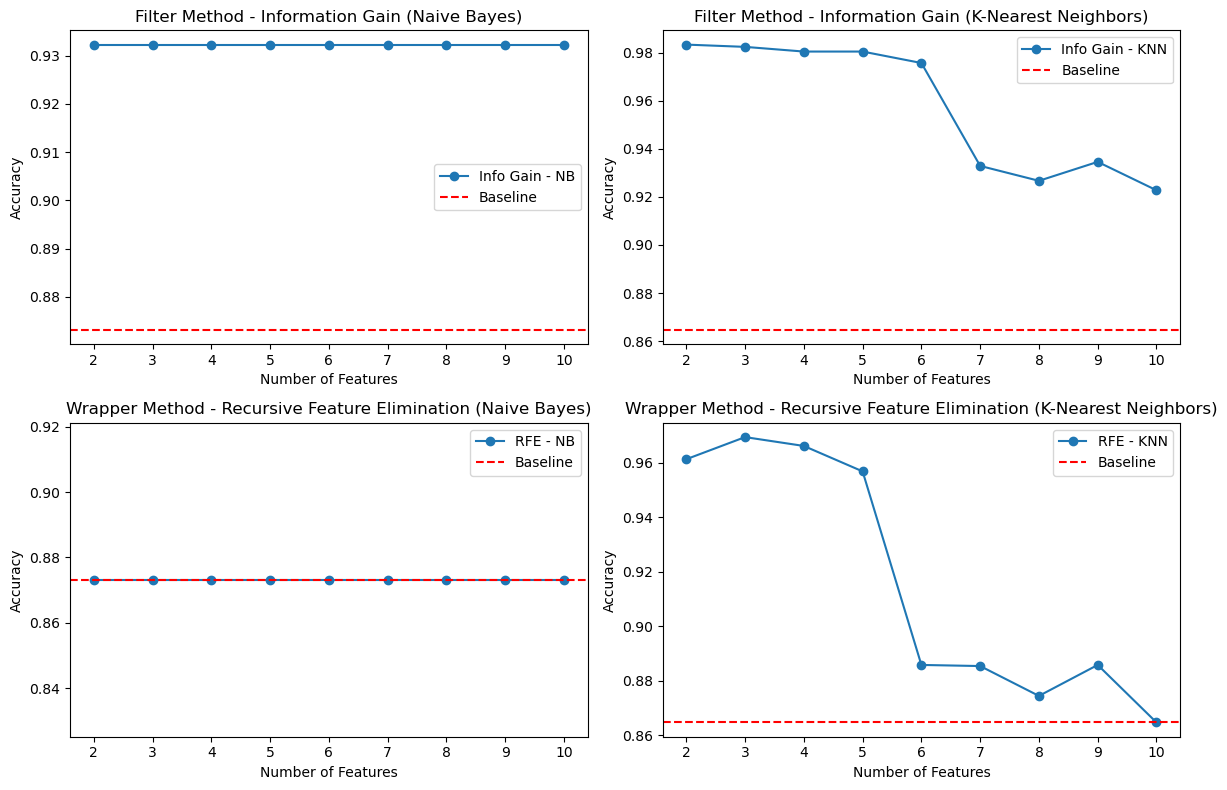

In [22]:
# Baseline performances
baseline_accuracy_nb = nb_accuracy  # F1 score of NB classifier in the baseline
baseline_accuracy_knn =knn_accuracy  # F1 score of KNN classifier in the baseline

# Plotting the results
plt.figure(figsize=(12, 8))

# Information Gain - Naive Bayes
plt.subplot(2, 2, 1)
plt.plot(n_components, f1_scores_info_gain_nb, marker='o', label='Info Gain - NB')
plt.axhline(y=baseline_accuracy_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Filter Method - Information Gain (Naive Bayes)')
plt.legend()

# Information Gain - K-Nearest Neighbors
plt.subplot(2, 2, 2)
plt.plot(n_components, f1_scores_info_gain_knn, marker='o', label='Info Gain - KNN')
plt.axhline(y=baseline_accuracy_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Filter Method - Information Gain (K-Nearest Neighbors)')
plt.legend()

# RFE - Naive Bayes
plt.subplot(2, 2, 3)
plt.plot(n_components, accuracy_rfe_nb, marker='o', label='RFE - NB')
plt.axhline(y=baseline_accuracy_nb, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Wrapper Method - Recursive Feature Elimination (Naive Bayes)')
plt.legend()

# RFE - K-Nearest Neighbors
plt.subplot(2, 2, 4)
plt.plot(n_components, accuracy_rfe_knn, marker='o', label='RFE - KNN')
plt.axhline(y=baseline_accuracy_knn, color='r', linestyle='--', label='Baseline')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Wrapper Method - Recursive Feature Elimination (K-Nearest Neighbors)')
plt.legend()

plt.tight_layout()
plt.show()

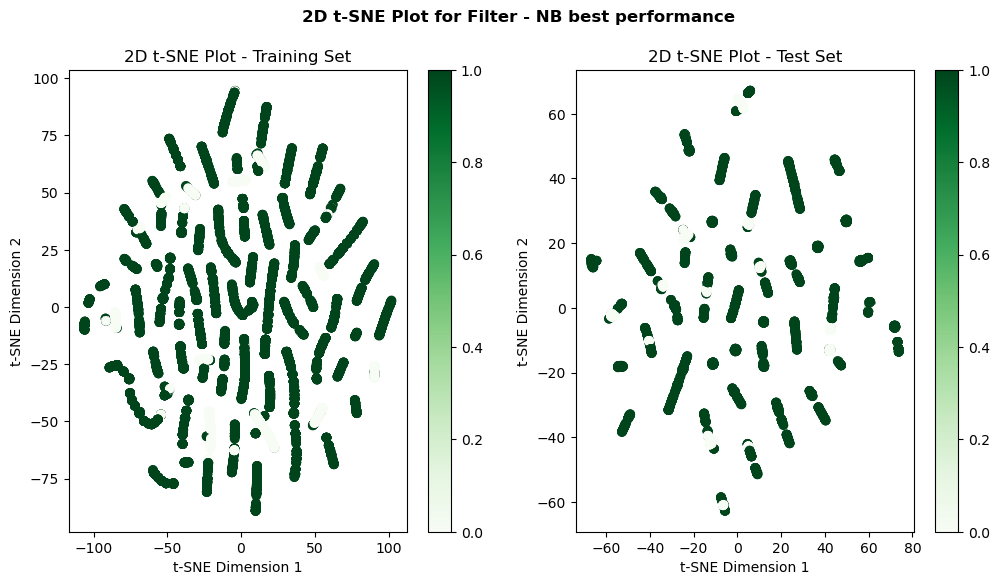

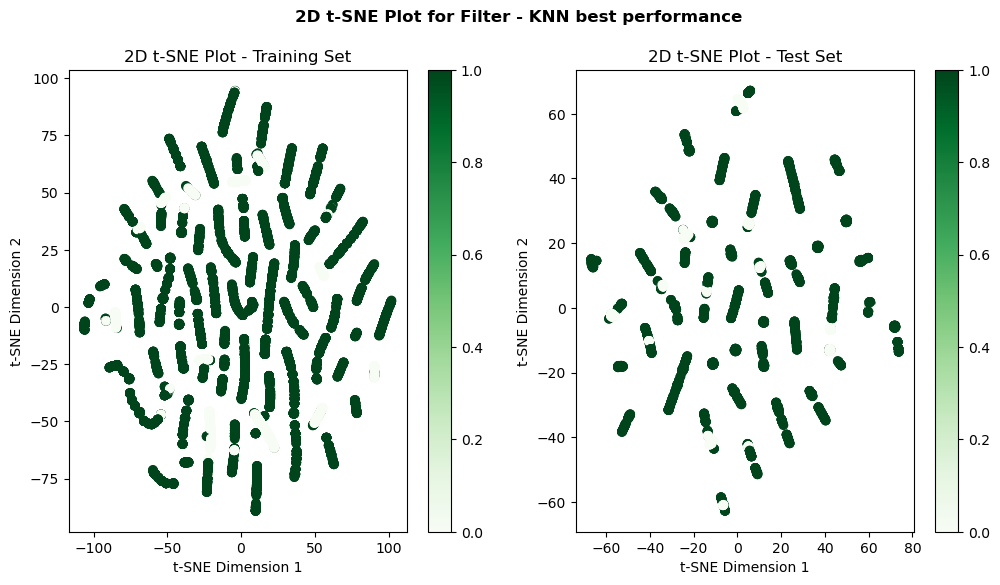

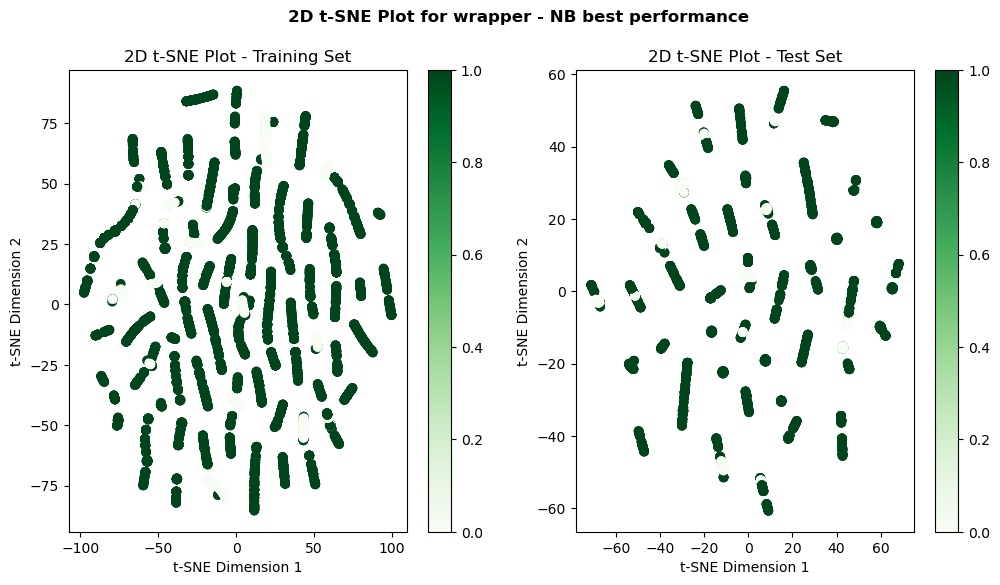

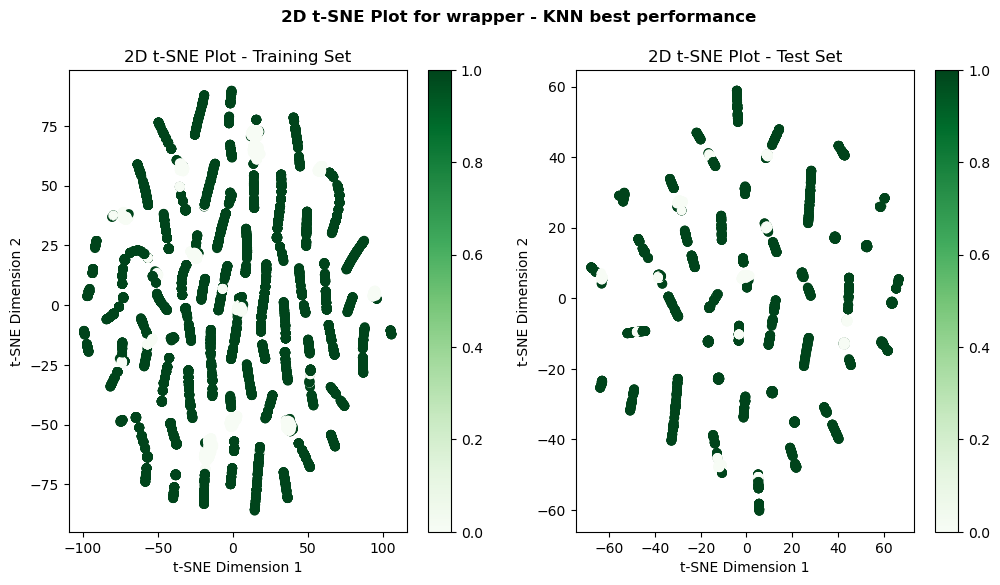

In [23]:
#draw 2D t-SNE Plot for Filter - NB best performance
selector = SelectKBest(mutual_info_classif, k=best_dimension_nb_filter)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

nb = GaussianNB()
nb.fit(x_train_selected, y_train)

visualize_tsne( x_train_selected, x_test_selected,"2D t-SNE Plot for Filter - NB best performance")

#draw 2D t-SNE Plot for Filter - KNN best performance
selector = SelectKBest(mutual_info_classif, k=best_dimension_knn_filter)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_selected, y_train)

visualize_tsne( x_train_selected, x_test_selected,"2D t-SNE Plot for Filter - KNN best performance")

#draw 2D t-SNE Plot for wrapper - NB best performance
selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=best_dimension_nb_wrapper)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_selected, y_train)

visualize_tsne( x_train_selected, x_test_selected,"2D t-SNE Plot for wrapper - NB best performance")

#draw 2D t-SNE Plot for wrapper - KNN best performance
selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=best_dimension_knn_wrapper)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_selected, y_train)

visualize_tsne( x_train_selected, x_test_selected,"2D t-SNE Plot for wrapper - KNN best performance")